### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
'''
There are multiple ways to do this (info, isnull, etc)

I like using the info and the isnull methods as I can also see the total amount of rows 
as well as the dtype
'''

data.info(verbose=True)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
'''
There are a few columns that have missing data:
1. Car
2. Bar
3. CoffeeHouse
4. CarryAway
5. RestaurantLessThan20
6. Restaurant20To50

In determining how to address the missing in each column, I typically follow this process:
1. What does the column or feature mean?
2. How much data is actually missing (percentage wise)
3. Is it a categorical or numerical column?
4. If categorical, is the percentage of missing data small enough to drop the rows?
5. If numerical, can I impute the missing data with the mean or median?
'''

def missing_data_info(col):
    total_missing = col.isnull().sum()
    if total_missing == 0:
        return
    
    pert_missing = round(total_missing / len(col) * 100, 2)
    print(f"{col.name.upper()} is missing {total_missing} or {pert_missing}% of the total")
    print(f"Number of unique values: {len(col.unique())}")
    print(f"Unique values: {col.unique()}")
    print('================')

data.apply(missing_data_info)


CAR is missing 12576 or 99.15% of the total
Number of unique values: 6
Unique values: [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
BAR is missing 107 or 0.84% of the total
Number of unique values: 6
Unique values: ['never' 'less1' '1~3' 'gt8' nan '4~8']
COFFEEHOUSE is missing 217 or 1.71% of the total
Number of unique values: 6
Unique values: ['never' 'less1' '4~8' '1~3' 'gt8' nan]
CARRYAWAY is missing 151 or 1.19% of the total
Number of unique values: 6
Unique values: [nan '4~8' '1~3' 'gt8' 'less1' 'never']
RESTAURANTLESSTHAN20 is missing 130 or 1.02% of the total
Number of unique values: 6
Unique values: ['4~8' '1~3' 'less1' 'gt8' nan 'never']
RESTAURANT20TO50 is missing 189 or 1.49% of the total
Number of unique values: 6
Unique values: ['1~3' 'less1' 'never' 'gt8' '4~8' nan]


destination             None
passanger               None
weather                 None
temperature             None
time                    None
coupon                  None
expiration              None
gender                  None
age                     None
maritalStatus           None
has_children            None
education               None
occupation              None
income                  None
car                     None
Bar                     None
CoffeeHouse             None
CarryAway               None
RestaurantLessThan20    None
Restaurant20To50        None
toCoupon_GEQ5min        None
toCoupon_GEQ15min       None
toCoupon_GEQ25min       None
direction_same          None
direction_opp           None
Y                       None
dtype: object

In [6]:
data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], inplace=True)
data.drop(columns=['car'], inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
accept_coupon = data[data['Y']==1]
reject_coupon = data[data['Y']==0]

total_accept = len(accept_coupon)/len(data)*100
print(f"Total accepted coupons: {round(total_accept,2)}%")

Total accepted coupons: 56.93%


5. Use a bar plot to visualize the `coupon` column.

In [8]:
fig = px.bar(data, x='coupon', color='coupon', title='Coupon Distribution')
fig.update_traces(dict(marker_line_width=0))
fig.show()

6. Use a histogram to visualize the temperature column.

In [9]:
fig = px.histogram(data, x='temperature', color='temperature', title='Temperature')
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
# Dataframe with just the bar coupons
df = data[data['coupon']== 'Bar']
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

2. What proportion of bar coupons were accepted?


In [11]:
accept_coupon_bar = df[df['Y']==1]
reject_coupon_bar = df[df['Y']==0]

total_accept_bar = len(accept_coupon_bar)/len(df)*100
print(f"Total accepted coupons: {round(total_accept_bar,2)}%")

Total accepted coupons: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [13]:
fewer_than_3 = ['never', 'less1', '1~3']
more_than_3 = ['4~8', 'gt8']

df_3_or_less = df[df['Bar'].isin(fewer_than_3) & df['Y']==1]
df_3_or_more = df[df['Bar'].isin(more_than_3) & df['Y']==1]

print(f"Total accepted coupons for 3 or less visits: {round(len(df_3_or_less)/len(df)*100,2)}%")
print(f"Total accepted coupons for 3 or more visits: {round(len(df_3_or_more)/len(df)*100,2)}%")


Total accepted coupons for 3 or less visits: 33.51%
Total accepted coupons for 3 or more visits: 7.68%


In [14]:
# I think the percentages above are misleading as this is the total number of coupons
# I think it would be better to look at the percentage of coupons accepted for each group

df_3_or_less = df[df['Bar'].isin(fewer_than_3)]
df_3_or_more = df[df['Bar'].isin(more_than_3)]

print(f"Total accepted coupons for 3 or less visits: {round(len(df_3_or_less[df_3_or_less['Y']==1])/len(df_3_or_less)*100,2)}%")
print(f"Total accepted coupons for 3 or more visits: {round(len(df_3_or_more[df_3_or_more['Y']==1])/len(df_3_or_more)*100,2)}%")

Total accepted coupons for 3 or less visits: 37.27%
Total accepted coupons for 3 or more visits: 76.17%


In [15]:
# So there is a higher percentage of individuals who accept the coupon if they 
# have been to the bar more than 3 times, however, there are more coupons that are
# accepted for individuals who have been to the bar 3 or less times as this is a 
# larger population

# This chart is a sanity check to make sure that the percentages make sense

fig = px.bar(df.sort_values(by='Y'), x='Bar', color='Y', title='Accepted Bar Coupons')
fig.update_traces(dict(marker_line_width=0))
fig.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [16]:
bar_group = ['1~3', '4~8', 'gt8']
age_group = ['26', '31', '50plus', '41', '36', '46']

df_bar_25_group = data[data['Bar'].isin(bar_group) & data['age'].isin(age_group)]
df_bar_25_group.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2674 entries, 110 to 12501
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2674 non-null   object
 1   passanger             2674 non-null   object
 2   weather               2674 non-null   object
 3   temperature           2674 non-null   int64 
 4   time                  2674 non-null   object
 5   coupon                2674 non-null   object
 6   expiration            2674 non-null   object
 7   gender                2674 non-null   object
 8   age                   2674 non-null   object
 9   maritalStatus         2674 non-null   object
 10  has_children          2674 non-null   int64 
 11  education             2674 non-null   object
 12  occupation            2674 non-null   object
 13  income                2674 non-null   object
 14  Bar                   2674 non-null   object
 15  CoffeeHouse           2674 non-null

In [17]:
accept_rate = len(df_bar_25_group[df_bar_25_group['Y']==1])/len(df_bar_25_group)*100
print(f"Total accepted bar coupons for 25+ age group: {round(accept_rate,2)}%")
print("There is a noticeable difference in the acceptance rate for the 25+ age group")

Total accepted bar coupons for 25+ age group: 62.3%
There is a noticeable difference in the acceptance rate for the 25+ age group


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [18]:
data['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [19]:
bar_group = ['1~3', '4~8', 'gt8']
passenger_group = ['Alone', 'Friend(s)', 'Partner']
not_occupation_group = ['Farming Fishing & Forestry']

df_1 = data[data['Bar'].isin(bar_group) & data['passanger'].isin(passenger_group) & ~data['occupation'].isin(not_occupation_group)]
df_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560 entries, 88 to 12545
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3560 non-null   object
 1   passanger             3560 non-null   object
 2   weather               3560 non-null   object
 3   temperature           3560 non-null   int64 
 4   time                  3560 non-null   object
 5   coupon                3560 non-null   object
 6   expiration            3560 non-null   object
 7   gender                3560 non-null   object
 8   age                   3560 non-null   object
 9   maritalStatus         3560 non-null   object
 10  has_children          3560 non-null   int64 
 11  education             3560 non-null   object
 12  occupation            3560 non-null   object
 13  income                3560 non-null   object
 14  Bar                   3560 non-null   object
 15  CoffeeHouse           3560 non-null 

In [20]:
accept_rate = len(df_1[df_1['Y']==1])/len(df_1)*100
print(f"Coupon acceptance rate: {round(accept_rate,2)}%")
print(f"There is little difference in the acceptance rate between this and the previous group")

Coupon acceptance rate: 62.5%
There is little difference in the acceptance rate between this and the previous group


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [21]:
def accept_rate(df):
    accept_rate = len(df[df['Y']==1])/len(df)*100
    return round(accept_rate,2)

group_1 = data[data['Bar'].isin(['1~3', '4~8', 'gt8']) & data['passanger'].isin(['Alone', 'Friend(s)', 'Partner']) & ~data['maritalStatus'].isin(['Widowed'])]
group_2 = data[data['Bar'].isin(['1~3', '4~8', 'gt8']) & data['age'].isin(['21','26','below21'])]
group_3 = data[data['income'].isin(['Less than $12500','$12500 - $24999', '$37500 - $49999', '$25000 - $37499']) & data['RestaurantLessThan20'].isin(['4~8', 'gt8'])]

print(f"Group 1 acceptance rate: {accept_rate(group_1)}%")
print(f"Group 2 acceptance rate: {accept_rate(group_2)}%")
print(f"Group 3 acceptance rate: {accept_rate(group_3)}%")

Group 1 acceptance rate: 62.5%
Group 2 acceptance rate: 62.92%
Group 3 acceptance rate: 60.25%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [22]:
'''
Based on these observations, I would say that those who accept bar coupons are:
1. Do not have kids
2. Are not widowed
3. Typically on the younger side (21, 26, 31)
4. Frequent the bar often
5. Have a higher income than what's considered low income

'''

"\nBased on these observations, I would say that those who accept bar coupons are:\n1. Do not have kids\n2. Are not widowed\n3. Typically on the younger side (21, 26, 31)\n4. Frequent the bar often\n5. Have a higher income than what's considered low income\n\n"

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [23]:
df_a = data.copy()
df_a.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [24]:
corr = pd.get_dummies(df_a).corr()
corr

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
temperature,1.000000,-0.020674,NaN,-0.155876,-0.215780,0.097539,-0.097539,0.056646,-0.055195,0.135593,...,-0.010777,0.001631,0.032488,-0.008270,-0.019569,0.025364,-0.037929,-0.000011,-0.041196,0.048195
has_children,-0.020674,1.000000,NaN,0.079735,-0.014038,-0.033047,0.033047,-0.048333,-0.009714,0.025733,...,0.087165,-0.049309,-0.032717,-0.026253,-0.008282,-0.028979,0.030315,-0.042433,0.040685,-0.022145
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155876,0.079735,NaN,1.000000,0.325558,-0.305952,0.305952,-0.081711,-0.138248,0.037875,...,0.000476,-0.003034,-0.008749,0.009304,0.003098,0.003011,-0.010738,-0.011596,0.006943,-0.001651
toCoupon_GEQ25min,-0.215780,-0.014038,NaN,0.325558,1.000000,-0.192784,0.192784,-0.100542,0.047257,-0.363978,...,0.009103,-0.006706,-0.008616,0.003185,-0.000023,-0.002463,-0.009563,-0.004395,-0.000742,0.011439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Restaurant20To50_1~3,0.025364,-0.028979,NaN,0.003011,-0.002463,-0.005917,0.005917,0.034087,-0.006364,0.007287,...,0.005820,0.098597,0.053754,-0.170644,-0.004157,1.000000,-0.147146,-0.089776,-0.582900,-0.273129
Restaurant20To50_4~8,-0.037929,0.030315,NaN,-0.010738,-0.009563,0.012923,-0.012923,0.041648,0.007643,-0.000763,...,-0.132042,0.109934,0.143164,-0.066943,-0.029792,-0.147146,1.000000,-0.036623,-0.237787,-0.111419
Restaurant20To50_gt8,-0.000011,-0.042433,NaN,-0.011596,-0.004395,-0.007997,0.007997,0.028239,-0.009642,0.007383,...,-0.129154,-0.066941,0.392835,-0.066687,-0.018177,-0.089776,-0.036623,1.000000,-0.145078,-0.067979
Restaurant20To50_less1,-0.041196,0.040685,NaN,0.006943,-0.000742,-0.013569,0.013569,-0.021321,-0.004330,0.008022,...,0.123777,-0.055171,-0.145756,0.061199,-0.118017,-0.582900,-0.237787,-0.145078,1.000000,-0.441374


In [25]:
def plot_col_acceptance(df, col):
    accept_count_per_group = round(df.groupby(col)['Y'].sum()/df.groupby(col)['Y'].count()*100,2).sort_values(ascending=False)
    col_values = accept_count_per_group.index

    fig = px.bar(accept_count_per_group,
                 x=col_values,
                 y=accept_count_per_group.values,
                 title=f'Acceptance Rate by {col}',
                 color=accept_count_per_group.values,)
    fig.update_traces(dict(marker_line_width=0))
    fig.show()
    fig.write_image(f"5.1_charts/{col}.png")


for col in df_a.columns:
    if col == 'Y':
        continue
    plot_col_acceptance(df_a, col)
    


### Building Model for Feature Importance

In [26]:
# I think a random forest classifier would be a good model to use here

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
df_c = pd.get_dummies(df_a)

In [28]:
target_col = 'Y'
X = df_c.drop(columns=target_col)
y = df_c[target_col]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
rfc = RandomForestClassifier(n_estimators=100)

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Predicting and Evaluating the Model
predictions = rfc.predict(X_test)

In [33]:
eval = classification_report(y_test, predictions)
print(eval)

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1543
           1       0.77      0.82      0.80      2081

    accuracy                           0.76      3624
   macro avg       0.75      0.75      0.75      3624
weighted avg       0.76      0.76      0.76      3624



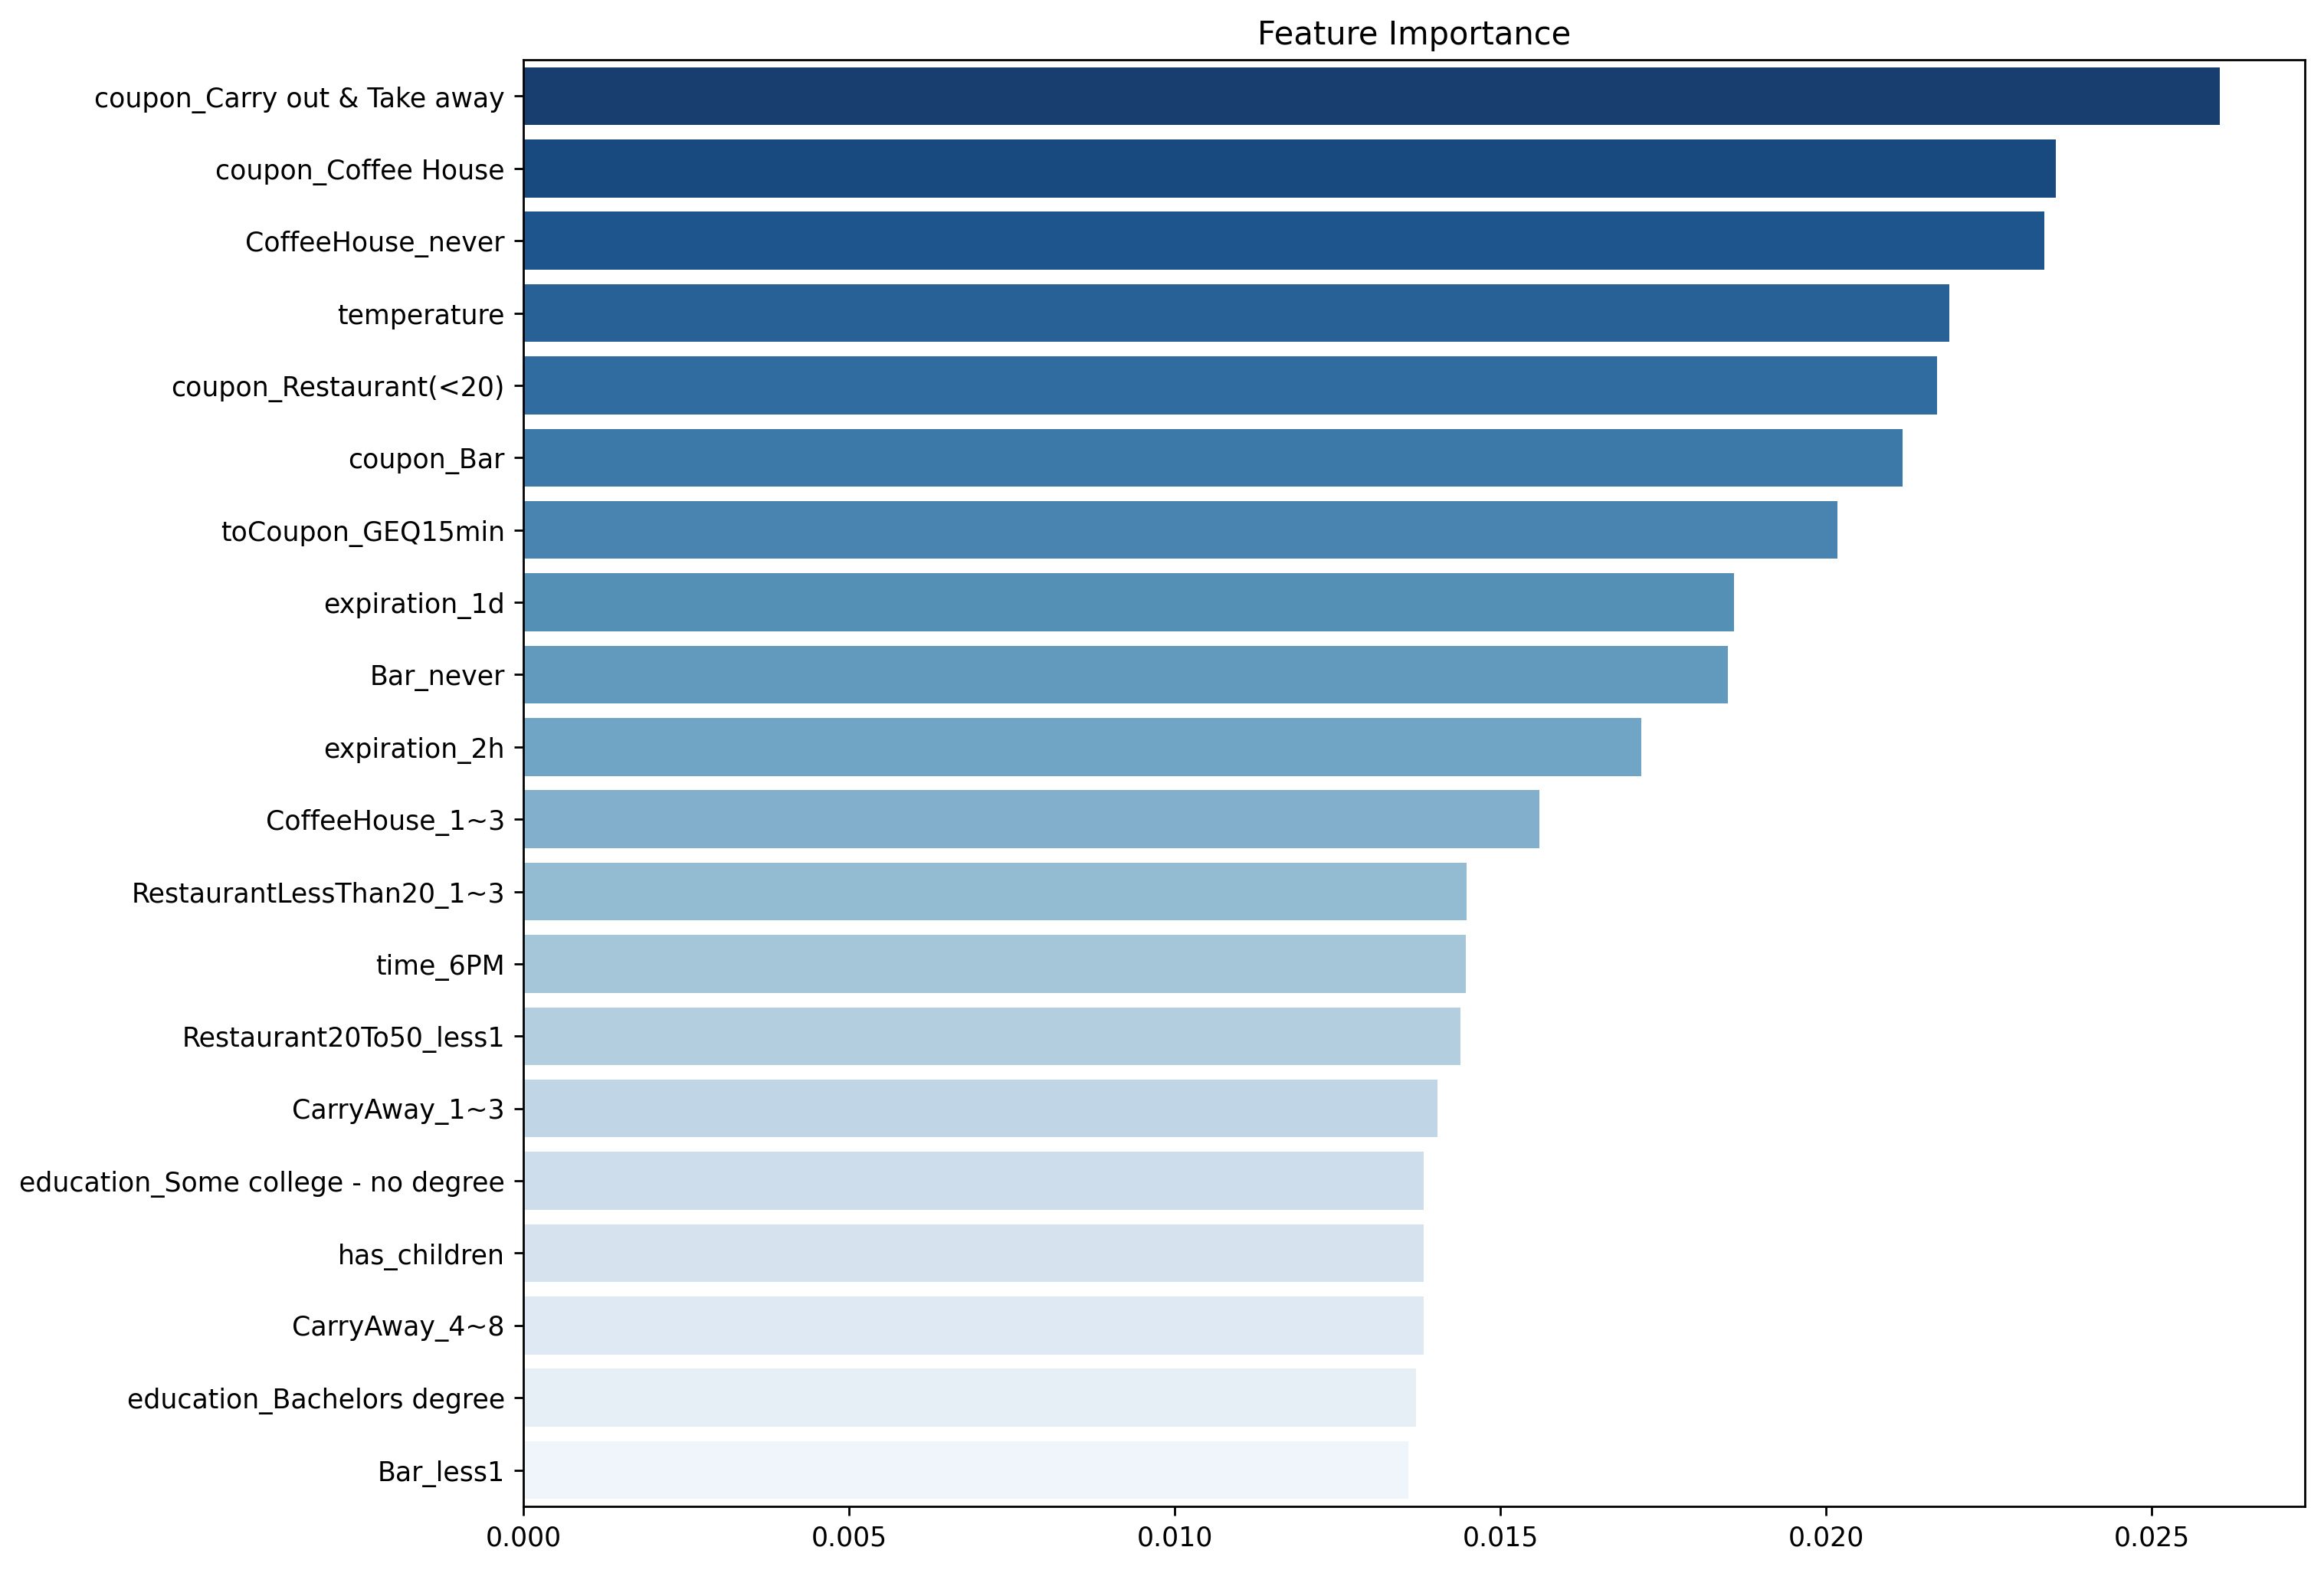

In [34]:
# Feature importance
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)[:20]

plt.figure(figsize=(12, 10), dpi=250)

sns.barplot(
    x=feat_importances, 
    y=feat_importances.index,
    palette="Blues_r")

plt.title("Feature Importance")

plt.savefig('5.1_charts/feature_importance.png', bbox_inches='tight')


# Final Conclusion

Based on the charts and the feature importance, I would say that the most important factors for coupon acceptance are:
1. The type of coupon (in this case if it's carry out or not)
2. The type of establishment (cheap restaurant, coffee house, etc)
3. The expiration date of the coupon (1 day tends to be more popular than 2 days)
4. The temperature (the hotter it is, the more likely a coupon will be accepted)
5. The frequency of visits to a particular establishment
6. Attributes of the individual (age, education, income, etc)

Likewise, the factors that tend to led to rejected coupons are:
1. The type of coupon and/or establishment (bar)
2. Expiration date (if it expires in the next couple of hours)
3. If the weather conditions make it difficult to use the coupon
4. How frequent someone visits an establishment (or lack thereof)
4. Attributes, in this case mostly lower income with kids or widowed tend to not use coupons

## Next Steps
- It might make sense to more accurately capture continuous values like age, or just expand the dataset in general like instead of a boolean for kids, maybe a boolean for kids and then how many kids. 
- There wasn't any information about distance to the establishment which I feel like would be a major factor. I think this should be included if possible